<a href="https://colab.research.google.com/github/ThibeVanOrshaegen/Suikerfabriek/blob/main/Pythondatagraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
corona_data = pd.read_csv('covid_19_data.csv')

In [4]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15769 entries, 0 to 15768
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              15769 non-null  int64  
 1   ObservationDate  15769 non-null  object 
 2   Province/State   7940 non-null   object 
 3   Country/Region   15769 non-null  object 
 4   Last Update      15769 non-null  object 
 5   Confirmed        15769 non-null  float64
 6   Deaths           15769 non-null  float64
 7   Recovered        15769 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 985.7+ KB


In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

Text(0, 0.5, 'Doden met doodsoorzaak COVID-19')

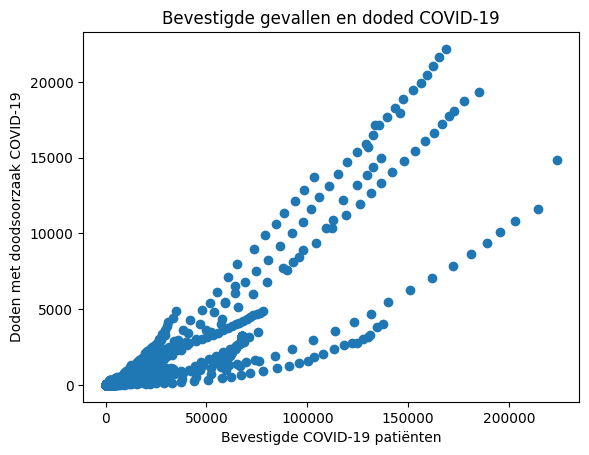

In [7]:
# maak een figuur aan en assen om op te plotten
fig, ax = plt.subplots()

# onderzoek de correlatie tussen het aantal confirmed cases en aantal sterfgevallen
ax.scatter(corona_data['Confirmed'], corona_data['Deaths'])
# Grafiektitel en as-labels
ax.set_title('Bevestigde gevallen en doded COVID-19')
ax.set_xlabel('Bevestigde COVID-19 patiënten')
ax.set_ylabel('Doden met doodsoorzaak COVID-19')

Text(0, 0.5, 'Doden met doodsoorzaak COVID-19')

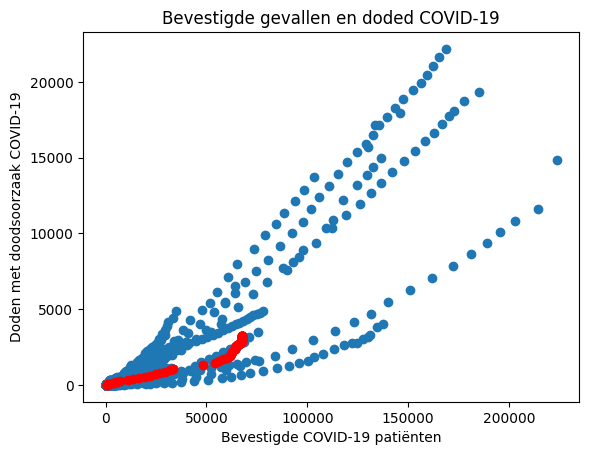

In [9]:
# maak een figuur aan en assen om op te plotten
fig, ax = plt.subplots()

# onderzoek de correlatie tussen het aantal confirmed cases en aantal sterfgevallen en licht Hubei uit in rood
ax.scatter(corona_data['Confirmed'], corona_data['Deaths'])
ax.scatter(corona_data[corona_data['Province/State']=='Hubei']['Confirmed'], corona_data[corona_data['Province/State']=='Hubei']['Deaths'], color='red')
# Grafiektitel en as-labels
ax.set_title('Bevestigde gevallen en doded COVID-19')
ax.set_xlabel('Bevestigde COVID-19 patiënten')
ax.set_ylabel('Doden met doodsoorzaak COVID-19')

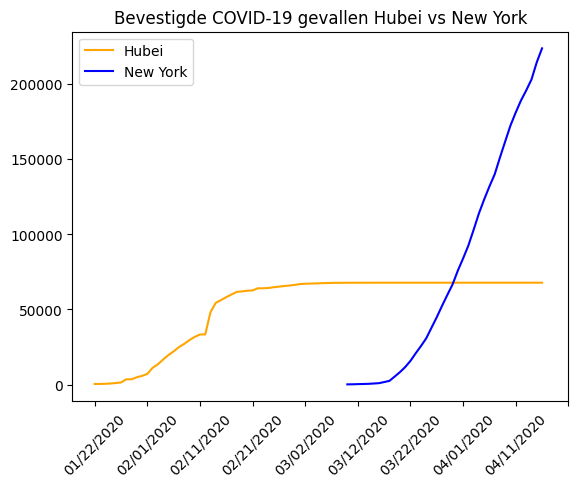

In [10]:
# maak een figuur aan en assen om op te plotten
fig, ax = plt.subplots()

# check het verloop door de tijd tussen Hubei en New York
ax.plot(corona_data[corona_data['Province/State']=='Hubei']['ObservationDate'], corona_data[corona_data['Province/State']=='Hubei']['Confirmed'], color='orange', label='Hubei')
ax.plot(corona_data[corona_data['Province/State']=='New York']['ObservationDate'], corona_data[corona_data['Province/State']=='New York']['Confirmed'], color='blue', label='New York')

# zorg voor nette x-as en titel en legenda
plt.xticks(np.arange(0,100,10), rotation = 45)
ax.set_title('Bevestigde COVID-19 gevallen Hubei vs New York')
ax.legend()
plt.show()

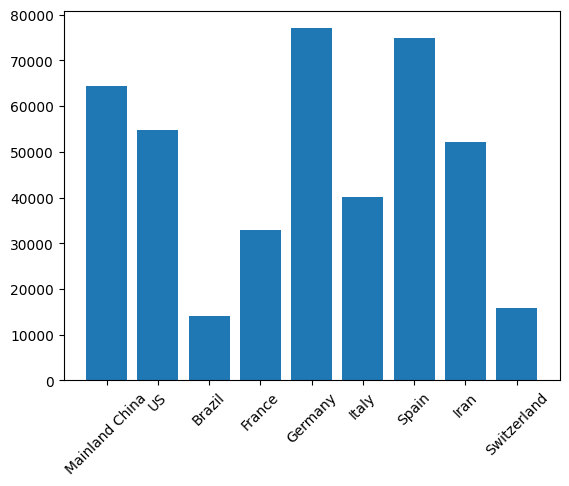

In [11]:
landen_met_corona = corona_data['Country/Region'].unique()
maximum_hersteld_per_land = {}

for land in landen_met_corona:
    sample_land = corona_data[corona_data['Country/Region']==land]
    max_hersteld = sample_land['Recovered'].max()
    if max_hersteld > 10000:
        maximum_hersteld_per_land[land] = max_hersteld

# maak een figuur aan en assen om op te plotten
fig, ax = plt.subplots()

ax.bar(list(maximum_hersteld_per_land.keys()), list(maximum_hersteld_per_land.values()))
plt.xticks(rotation = 45)
plt.show()